#  Да ли богатији троше више ресурса?
У претходној лекцији смо прегледали податке који су достпуни у оквиру скупа __[**National Footprint and Biocapacity Accounts 2021 Public Data Package**](https://www.footprintnetwork.org/licenses/public-data-package-free/)__. На подацима смо направили одређене измене које смо сачували у новој табели *NFA 2021 v2*. Ову табелу ћемо користити у наредним анализама. 

In [2]:
import pandas as pd

otisak = pd.read_csv('podaci/NFA 2021 v2.csv')

Већ је речено да се помоћу варијабле *Number of Earths required* може исказати у којој мери нека држава троши своје, али и глобалне биокапацитете. Сада ћемо трошење природних ресурса приказати директније, као однос укупних биокапацитета сваке државе и њеног укупног еколошког отиска. Разлика између укупног еколошког отиска државе и њених биокапацитета означава се као *еколошки дефицит* уколико је отисак већи од биокапацитета или *еколошка резерва* уколико је обратно. Значи, ако нека држава троши онолико ресурса колико их има на располагању, однос ове две вредности биће 1. Државе ћемо приказати тачкацима у дводимензионалном координатном систему у коме су на x-оси вредности еколошког отиска, а на y-оси вредности укупног биокапацитета државе. На тај начин можемо да видимо какво је "распршење" држава и колико нјих има разлилите комбинације вредности две варијабле (високе-високе, ниске-ниске, високе-ниске, просечне-ниске итд.). Тачкице ћемо обојити различитим бојама у зависности од њиховог богатства, односно категорије просечних прихода њихових становника.  

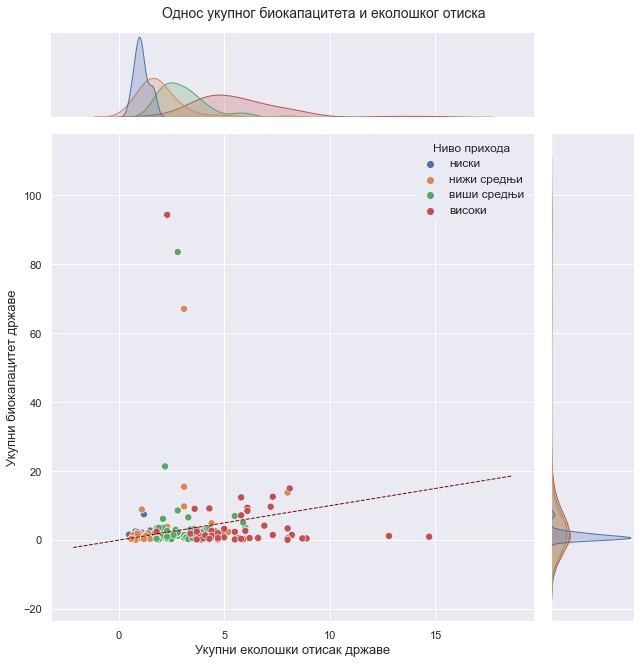

In [3]:
import matplotlib.pyplot as plt
import seaborn as sbrn

logTra = False # Подесите на True ако желите да се вредности на осама трансформишу
graBio = 100   # Подесите на мању вредност ако желите да смањите распон варијабле Total biocapacity

sbrn.set_theme(style='darkgrid')

# Овај тип графикона приказује "укрштање" дистрибуција две варијабле  
graf = sbrn.jointplot(data=otisak[otisak['Total biocapacity'] < graBio].sort_values(by='Income Group R'), hue='Income Group',
    x='Total Ecological Footprint', y='Total biocapacity', height=9, s=50)

# Наслов графикона и називи оса
graf.fig.suptitle("Однос укупног биокапацитета и еколошког отиска", y=1.02, fontsize = 14)
graf.ax_joint.set_xlabel('Укупни еколошки отисак државе', fontsize=13)
graf.ax_joint.set_ylabel('Укупни биокапацитет државе', fontsize=13)

# Логаритамска трансформација вредности на осама
if logTra:
    graf.ax_joint.set_xscale('log')
    graf.ax_joint.set_yscale('log')

# Уређивање изгледа легенде
leg = graf.ax_joint.legend_
leg.set_title('Ниво прихода', prop = {'size':12})
nazKat = ['ниски', 'нижи средњи', 'виши средњи', 'високи']
leg.get_frame().set_linewidth(0)
plt.setp(leg.get_texts(), fontsize='12')
for rb, lab in enumerate(leg.get_texts()):
    leg.get_texts()[rb].set_text(nazKat[rb])

# Цртање дијагоналне линије, тј. функције y = x
x0, x1 = graf.ax_joint.get_xlim()
y0, y1 = graf.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
graf.ax_joint.plot(lims, lims, color='maroon', linestyle='--', linewidth=1)

plt.show()

Црвеном линијом на горњем графикону исцртана је функција `y = x`, тачније граница одрживости. То је теоријски низ вредности који приказује однос у коме би свака држава трошила онолико ресурса колико их има на располагању. Видимо да је нешто више држава испод те линије што показује да имају еколошки дефицит, тј. да им је вредност на x-оси (потрошња) већа од вредности на y-оси (биокапацитет). На основу боје тачкица може се закључити да су то углавном државе са високим просечним приходима становника. На ободима дијаграма распршења приказане су и дистрибуције вредности обе варијабле што нам омогућава да проценимо њихове просеке и степен варијаблности за сваку категорију држава. Дистрибуције категорија су обојене бојама које су приказане на легенди.

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Велика варијабилност појава отежава нам интерпретацију резутата приказаних на горњем графикону. Подесите вредност варијабле <b>logTra</b> у горњем коду на <b>True</b> да бисте трансформисали вредности на осама рачунањем њихових логаритама.</div> 

>Логаритамска трансформација вредности на осама координатног система је метода која се често користи како би се унапредила читљивост графикона. У основи, ради се o умањивању вредности али тако да се оне које се веома велике умање више од оних мањих. Стога се оваква врсте трансформације назива *нелинеарном*. На пример, логаритам броја 10 је 1, броја 100 је 2, а броја 1.000 је 3. Очигледно је да се вредности на осама након трансформације не могу интерпретирати на исти начин, али то нам није толико битно. Битно је да су односи међу објектима приказаним на графикону остали у суштини непромењени и да можемо лакше да их поредимо. При томе нисмо уклонили ниједан аутлајер како што бисмо то учинили када бисмо смањили вредност варијабле `graBio` у горњем коду.

Еколошки дефицит или резерва већ су израчунати за сваку државу и забележени у колони *Ecological Deficit or Reserve*. Приказаћемо основне описне показатеље ове варијабле за четири групе држава формиране на основу категорија просечних прихода по становнику.

In [4]:
# Групишемо државе по категоријама прихода
tabela = otisak.groupby('Income Group R')['Ecological Deficit or Reserve'].describe().reset_index()

# Мењамо називе колона
tabela.rename(columns={'Income Group R': 'Приходи', 'count': 'Број држава'}, inplace=True)

# Мењамо ознаке категорија текстом
tabela['Приходи'].replace({1: 'ниски', 2: 'нижи средњи', 3: 'виши средњи', 4: 'високи'}, inplace=True)

# Приказујемо табелу
tabela

,Приходи,Број држава,mean,std,min,25%,50%,75%,max
0,ниски,35.0,0.160000,1.247869,-0.8,-0.400,-0.20,0.100,6.3
1,нижи средњи,47.0,1.617021,9.680355,-2.9,-1.050,-0.60,0.500,64.0
2,виши средњи,46.0,1.419565,12.470189,-3.1,-1.775,-1.15,0.075,80.9
3,високи,56.0,-1.241071,13.341811,-13.8,-5.325,-3.25,-1.675,92.1


<div class="alert alert-block alert-success"><img src="slike/recnik.png" align="left"/>Искористите речник на крају курса да бисте се подсетили појма стандардне девијације. Можда ће вам бити лакше да је разумете на примеру школских оцена.</div> 

Из табеле се види да богатије државе имају негативну просечну вредности варијабле, тј. еколошки дефицит. Највећу еколошку резерву у просеку имају државе са приходима који су окарактерисани као нижи средњи. Међутим, приликом поређења група у статистици треба имати на уму две јако битне ствари. Прва је да бројеви који се разликују у апсолутном смислу уопше не морају да буду и *статистички значајно* различити. То значи да разлике међу аритметичким срединама, нпр. друге две категорије држава, могу да буду небитне или потпуно случајне. Тестирање значајности разлика између две аритметичке средине обично се обавља методом која се зове *t-тест*. Израчунаћемо вредност t-теста за два пара категорија држава (НС-ВС и НС-ВИ) уз помоћ пакета `scipy`. Можете самостално да промените параметре у коду испод и израчунате вредности t-теста за друге парове аритметичких средина. 

In [5]:
from scipy.stats import ttest_ind

# Рачунање t-теста за комбинацију прихода НС-ВС 
ttestNSVS = ttest_ind(otisak[otisak['Income Group R'] == 2]['Ecological Deficit or Reserve'], 
    otisak[otisak['Income Group R'] == 3]['Ecological Deficit or Reserve'])

# Рачунање t-теста за комбинацију прихода НС-ВИ
ttestNSVI = ttest_ind(otisak[otisak['Income Group R'] == 2]['Ecological Deficit or Reserve'], 
    otisak[otisak['Income Group R'] == 4]['Ecological Deficit or Reserve'])

# Исписивање вредности t-теста
print ('Нижи средњи - виши средњи: t = ', ttestNSVS[0].round(2), ', p = ', ttestNSVS[1].round(2))
print ('Нижи средњи - високи: t = ', ttestNSVI[0].round(2), ', p = ', ttestNSVI[1].round(2))

Нижи средњи - виши средњи: t =  0.09 , p =  0.93
Нижи средњи - високи: t =  1.22 , p =  0.22


Функција `ttest_ind` враћа две вредности којима смо приступили преко индекса 0 и 1 и заокружили на две децимале. Прва је вредност t-теста, а друга је тзв. *p-вредност* („пе“ вредност). Вредност p нам на одређени начин показује колика је вероватноћа да се разлика међу аритметичким срединама коју смо добили десила сасвим случајно. У оба примера та вероватноћа је релативно велика, поготово за први пар варијабли. То значи да разлике не можемо да сматрамо стварним или статистички значајним. Консензус у статистици је да се разлике, односно статистички тестови, сматрају значајним ако су p-вредности мање од 0,05 или, још боље, 0,01.

Приказаћемо ову другу разлику и графички. Полигоном фреквенција ћемо исцртати дистрибуције варијабле *Ecological Deficit or Reserve* за државе из група ниже средњих и високих прихода. Линијама ћемо обележити аритметичке средине дистрибуција.

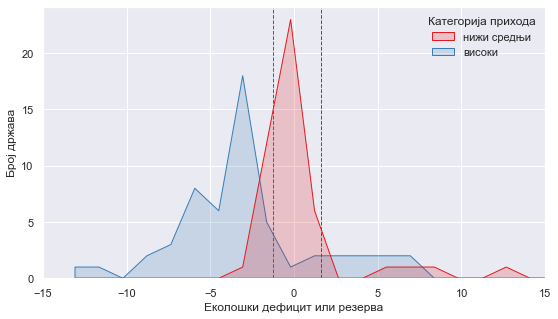

In [6]:
# Дефинишемо величину графикона
plt.figure(figsize = (9,5))

# Исцртавамо полигон фреквенција (element='poly') за Ecological Deficit or Reserve
# Ограничавамо државе на две групе ['Income Group R'].isin([2,4])
ax = sbrn.histplot(otisak[(otisak['Income Group R'].isin([2,4]))], 
    x='Ecological Deficit or Reserve', hue='Income Group R', alpha=0.2, element='poly', palette='Set1')

# Подешавамо наслов графикона и називе оса
ax.set_xlabel('Еколошки дефицит или резерва')
ax.set_ylabel('Број држава')

# Нећемо уклањати аутлајере, али ћемо ограничити распон x-осе
ax.set_xlim(-15,15)

# Учитавамо објекат legend графикона у варијаблу leg
leg = ax.get_legend()
# да бисмо променили неколико параметара легенде
leg.set_frame_on(False)
leg.set_title('Категорија прихода')
leg.texts[0].set_text('нижи средњи')
leg.texts[1].set_text('високи')

# Исцртавамо линије којима су представљене аритметичке средине 
ax.axvline(otisak[otisak['Income Group R']==2]['Ecological Deficit or Reserve'].mean(), linestyle='--', color='#c52425', lw=1)
ax.axvline(otisak[otisak['Income Group R']==4]['Ecological Deficit or Reserve'].mean(), linestyle='--', color='#346994', lw=1)

plt.show()

Обратите пажњу да су аритметичке средине дистрибуција померене удесно у односу на доминантне вредности, односно „брдашца“. Разлог су аутлајери које нисмо уклонили, али се не виде на графикону јер смо ограничили распон x-осе на -15 до 15. Осим тога, просек еколошких резерви је очигледно већи у групи држава са нижим приходима, али t-тест је показао да та разлика није статистички значајна. Овде долазимо до друге веома битне ствари везане за тестирање разлика, а то је варијабилност појаве унутар група. На основу вредности у горњој табели видимо да је стандардна девијација у категорији најбогатијих држава веома висока, тј. да је варијабилност међу државама веома велика. Распон вредности се креће од -13.8 до чак 92.1. Због тога ни аритметичке средине група не можемо сматрати нарочито поузданим, па тако ни вредност t-теста. Стога се у статистици често користе и „грубље“ методе за тестирање разлика међу групама у којима се не рачунају просеци већ се пореде рангови ентитета на некој варијабли. Један такав тест је *Мен-Витнијев U тест* (енгл. *Mann–Whitney U test*). Израчунаћемо и његове вредности за исте парове категорија држава.

In [7]:
from scipy.stats import mannwhitneyu

# Рачунање М-В теста за комбинацију прихода НС-ВС
MWNSVS = mannwhitneyu(otisak[otisak['Income Group R'] == 2]['Ecological Deficit or Reserve'], 
    otisak[otisak['Income Group R'] == 3]['Ecological Deficit or Reserve'])

# Рачунање М-В теста за комбинацију прихода НС-ВИ
MWNSVI = mannwhitneyu(otisak[otisak['Income Group R'] == 2]['Ecological Deficit or Reserve'], 
    otisak[otisak['Income Group R'] == 4]['Ecological Deficit or Reserve'])

# Исписивање вредности М-В теста
print ('Нижи  средњи - виши средњи: U = ', MWNSVS[0].round(2), ', p = ', MWNSVS[1].round(2))
print ('Нижи  средњи - високи: U = ', MWNSVI[0].round(2), ', p = ', MWNSVI[1].round(2))

Нижи  средњи - виши средњи: U =  1450.0 , p =  0.0
Нижи  средњи - високи: U =  2130.5 , p =  0.0


Овога пута резултати су потпуно другачији. Мен-Витнијев тест показује да су разлике међу свим категоријама држава заиста статистички значајне и да најбогатије државе заиста троше значајно више природних ресурса, више од осталих држава и више од онога што имају на располагању. Имајте на уму да p вредности заправо нису нулте и никада не могу да буду, већ су само изузетно мале.

Наравно, у ситуацијама када варијабилност не би била толико велика или у ситуацијама када је разлика међу групама изузетно велика, чак и уз велику варијабилност, t-тест би нам указао на постојање значајне разлике. У наредном примеру ћемо израчунати један веома очигледан t-тест који нам говори да се државе са ниским и високим приходима статистички значајно разликују по вредностима БДП. 

In [8]:
ttestNSVS = ttest_ind(otisak[otisak['Income Group R'] == 1].dropna()['GDP per cap'], 
    otisak[otisak['Income Group R'] == 4].dropna()['GDP per cap'])

print ('Разлика БДП између држава са ниским и високим приходима: t =', ttestNSVS[0].round(2), ', p =', ttestNSVS[1].round(2))

Разлика БДП између држава са ниским и високим приходима: t = -9.5 , p = 0.0


На крају, погледајмо и које то државе имају веома високе вредности еколошког дефицита или еколошких резерви. Овога пута ћемо приказати резултате на 3Д дијаграму распршења користећи пакете бибилиотеке `plotly`. Поред варијабле `Ecological Deficit or Reserve` приказаћемо и вредности __[индекса хуманог развоја](https://sr.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D1%85%D1%83%D0%BC%D0%B0%D0%BD%D0%BE%D0%B3_%D1%80%D0%B0%D0%B7%D0%B2%D0%BE%D1%98%D0%B0)__ (HDI) којим се мере сиромаштво, писменост, образовање и животни век нације, као и индекс остварења __[циљева одрживог развоја](https://www.rs.undp.org/content/serbia/sr/home/sustainable-development-goals.html)__ (SDGi).

In [9]:
import plotly.express as px

# Исцртавамо 3Д хистограм, али искључујемо неколико држава са веома ниским вредностима због прегледности графикона
graf = px.scatter_3d(otisak[otisak['Ecological Deficit or Reserve'] < 20], 
    x='HDI', y='SDGi', z='Ecological Deficit or Reserve', 
    color='Region', width=800, height=600, hover_data=['Country'])

# Мало естетски дотерујемо тачкице (маркере) 
graf.update_traces(marker=dict(size=6, line=dict(width=1, color='white')), selector=dict(mode='markers'))

# Смањујемо маргине графикона, позиционирамо легенду и постављамо називе графикона и оса
graf.update_layout(margin=dict(l=0, r=0, t=0, b=0), legend=dict(title='Регион', y=0.99, x=0.01, bgcolor='rgba(0,0,0,0)'),
    scene=dict(xaxis_title='Индекс хуманог развоја', yaxis_title='Индекс одрживог развоја', zaxis_title='Еколошки дефицит или резерва'))

# Овде уметнине код за промену назива региона у легенди

graf.show()

Ротирајте графикон и анализирајте повезаности међу варијаблама, као и позиције држава. Уочите да је индекс одрживог развоја у већој корелацији са индексом хуманог развоја него са еколошким резервама. Ово је и логично, јер се одрживи развој не тиче само остварења циљева везаних за екологију, већ и за побољшање здравља, смањење сиромаштва, унапређење образовања итд. Ови показатељи су много ближи онима на основу којих се рачуна индекс хуманог развоја. Уочите и то да земље Арапског полуострва имају највећи еколошки дефицит јер су им биокапацитети ниски, а богатство (нафтом) подиже потрошачке капацитете њихових грађана. Покушајте да процените степен и смер (+ или -) међусобне корелације варијабли приказаних на графикону, а потом упоредите своју процену са вредностима у наредној корелационој матрици.

In [10]:
otisak[otisak['Ecological Deficit or Reserve'] < 20][['HDI', 'SDGi', 'Ecological Deficit or Reserve']].corr().round(2)

,HDI,SDGi,Ecological Deficit or Reserve
HDI,1.00,0.90,-0.03
SDGi,0.90,1.00,-0.19
Ecological Deficit or Reserve,-0.03,-0.19,1.00


<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Покушајте сами да пронађете начин да промените називе региона у легенди графикона. Као полазна основа може да вам послужи <a href='https://stackoverflow.com/questions/64371174/plotly-how-to-change-variable-label-names-for-the-legend-in-a-plotly-express-li' target='_blank'>овај чланак</a>. Ако се не снађете, искористите код из датотеке <a href='podaci/legenda.txt' target='_blank'>legenda.txt</a>.</div> 

**Да ли богатији троше више ресурса?**

Одговор на питање из наслова је потврдан. Виши ниво општег благостања грађана зависи од нивоа економског развоја државе. Са друге стране, развијена економија очигледно подразумева и већу потребу за биокапацитетима. 